<a href="https://colab.research.google.com/github/tomhav/Breast-Cancer-Classification-through-Federated-learning/blob/main/FederartedLearning_On_WBrCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PrivFED-A Framework for Privacy-Preserving Federated Learning in Enhanced Breast Cancer Diagnosis.

Abstract : On a day-to-day basis, hospitals engage in the transaction of thousands of Personally Identifiable Information (PII) data with other healthcare institutions, making data prone to various cybersecurity threats. In the present study, a federated learning framework is proposed, trained on the Wisconsin dataset. The framework incorporates various techniques to address challenges such as data scarcity and imbalance, utilizing the Synthetic Minority Over-sampling Technique (SMOTE) to enhance robustness. Additionally, isolation forests are employed to enhance the model's resilience to outliers. In the classification process across all devices, Catboost was utilized. An analysis was conducted to identify optimal features for achieving higher accuracy, employing Principal Component Analysis (PCA). Furthermore, the significance of hyperparameter tuning is emphasized through a comparative analysis. The model demonstrated an average accuracy of 99.95% on edge devices and 98% on the central server.

## Mount the Storage

In [5]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Without PCA

##Load the neccesary libraries

In [6]:
!pip3 install catboost
import catboost as cbt

In [7]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [8]:
import matplotlib.pyplot as plt

In [9]:
import pickle

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import numpy as np


## Preparing the Dataset

## Importing Dataset

In [7]:
import pandas as pd
df = pd.read_csv("/content/data.csv")
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dividing the dataset into three parts.


> The data set is divided into three equal parts to simulate individial data from users.




In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/data.csv")
# df = df.dropna()
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

# Assuming 'df' is your DataFrame
columns_str = ', '.join(f"'{col}'" for col in df.columns)

# Print or use the result as needed
print(columns_str)


'id', 'label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'


In [9]:
df['label']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: label, Length: 569, dtype: object

In [10]:
df=df[['label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
df = df[df['label']!=' ']
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('label', axis=1)
y = df['label']

Label Count Before SMOTE Analysis.

In [ ]:
df.label.value_counts()

B    357
M    212
Name: label, dtype: int64

## Performing SMOTE Analysis

In [11]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={"B":20000,"M":20000})

In [12]:
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class B will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class M will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Label Count AFTER SMOTE Analysis.

In [13]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [14]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

Label Count AFTER SMOTE Analysis.

In [15]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [16]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

## Outlier Detection and Removal using Isolation Forest Classifier

In [18]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [19]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

Label Count AFTER Outliers Removal.

In [20]:
pd.Series(y).value_counts()

B    18894
M    17106
Name: label, dtype: int64

Dividing the data set into three parts ( For ED1 , ED2 and CS)

In [21]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

## Virtual Edge Machines:
A virtual edge machine is a virtualized version of an edge device that is used in federated learning. It simulates the behavior of an actual edge device, such as a smartphone or an IoT sensor, in a controlled environment. It allows researchers and engineers to test and develop federated learning models without the need for actual physical devices.



### Virtual edge machine 1

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0:	learn: 0.1704425	total: 51.4ms	remaining: 2.52s
1:	learn: 0.0993792	total: 56.1ms	remaining: 1.35s
2:	learn: 0.0701955	total: 60.6ms	remaining: 950ms
3:	learn: 0.0608848	total: 65ms	remaining: 748ms
4:	learn: 0.0539739	total: 69.3ms	remaining: 624ms
5:	learn: 0.0453198	total: 73.6ms	remaining: 540ms
6:	learn: 0.0405171	total: 78ms	remaining: 479ms
7:	learn: 0.0319115	total: 82.4ms	remaining: 433ms
8:	learn: 0.0293359	total: 87ms	remaining: 396ms
9:	learn: 0.0247483	total: 91.3ms	remaining: 365ms
10:	learn: 0.0220525	total: 95.6ms	remaining: 339ms
11:	learn: 0.0204084	total: 99.8ms	remaining: 316ms
12:	learn: 0.0189403	total: 104ms	remaining: 296ms
13:	learn: 0.0183951	total: 108ms	remaining: 278ms
14:	learn: 0.0164781	total: 112ms	remaining: 262ms
15:	learn: 0.0155641	total: 117ms	remaining: 248ms
16:	learn: 0.0147789	total: 121ms	remaining: 234ms
17:	learn: 0.0133854	total: 126ms	remaining: 224ms
18:	learn: 0.0117501	total: 130ms	remaining: 212ms
19:	learn: 0.0109646	total: 135ms	r

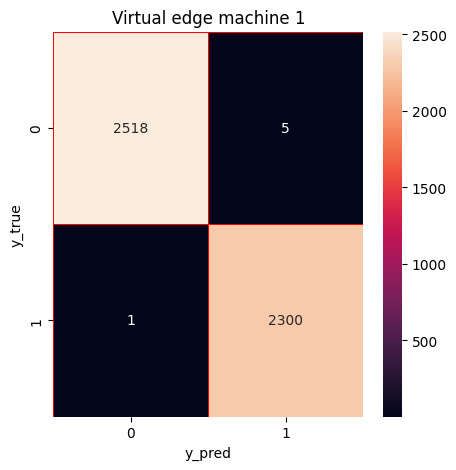

In [23]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth =3 ,iterations=50, learning_rate=0.5)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

Hyperparameter tuning ED-1

Streaming output truncated to the last 5000 lines.
64:	learn: 0.0026809	total: 554ms	remaining: 1.15s
65:	learn: 0.0026473	total: 563ms	remaining: 1.14s
66:	learn: 0.0025424	total: 571ms	remaining: 1.13s
67:	learn: 0.0024955	total: 579ms	remaining: 1.12s
68:	learn: 0.0023865	total: 587ms	remaining: 1.11s
69:	learn: 0.0023063	total: 595ms	remaining: 1.1s
70:	learn: 0.0022455	total: 604ms	remaining: 1.1s
71:	learn: 0.0021647	total: 612ms	remaining: 1.09s
72:	learn: 0.0020732	total: 625ms	remaining: 1.09s
73:	learn: 0.0020137	total: 634ms	remaining: 1.08s
74:	learn: 0.0019497	total: 642ms	remaining: 1.07s
75:	learn: 0.0019001	total: 651ms	remaining: 1.06s
76:	learn: 0.0018292	total: 659ms	remaining: 1.05s
77:	learn: 0.0017857	total: 667ms	remaining: 1.04s
78:	learn: 0.0017258	total: 675ms	remaining: 1.03s
79:	learn: 0.0016816	total: 684ms	remaining: 1.02s
80:	learn: 0.0016366	total: 692ms	remaining: 1.01s
81:	learn: 0.0016076	total: 700ms	remaining: 1.01s
82:	learn: 0.0015782	total: 708ms

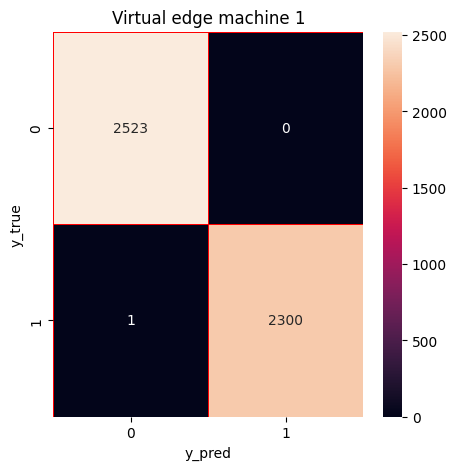

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge1 = best_model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('advanced_local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

In [25]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 1: ", normal_edge1_acc)
print("Accuracy of Hyper Parameter tuned Edge 1: ", edge1_acc)

Accuracy of Normal Edge 1:  0.9987562189054726
Accuracy of Hyper Parameter tuned Edge 1:  0.9997927031509121


### Virtual edge machine 2

0:	learn: 0.1555451	total: 19ms	remaining: 930ms
1:	learn: 0.0761319	total: 46.2ms	remaining: 1.11s
2:	learn: 0.0483960	total: 70.3ms	remaining: 1.1s
3:	learn: 0.0365862	total: 93.8ms	remaining: 1.08s
4:	learn: 0.0223336	total: 113ms	remaining: 1.02s
5:	learn: 0.0157828	total: 145ms	remaining: 1.06s
6:	learn: 0.0132739	total: 164ms	remaining: 1.01s
7:	learn: 0.0099470	total: 212ms	remaining: 1.11s
8:	learn: 0.0079870	total: 239ms	remaining: 1.09s
9:	learn: 0.0072986	total: 270ms	remaining: 1.08s
10:	learn: 0.0065636	total: 298ms	remaining: 1.06s
11:	learn: 0.0055926	total: 329ms	remaining: 1.04s
12:	learn: 0.0044517	total: 354ms	remaining: 1.01s
13:	learn: 0.0039002	total: 380ms	remaining: 978ms
14:	learn: 0.0034987	total: 403ms	remaining: 940ms
15:	learn: 0.0031047	total: 422ms	remaining: 897ms
16:	learn: 0.0028218	total: 449ms	remaining: 871ms
17:	learn: 0.0026377	total: 471ms	remaining: 837ms
18:	learn: 0.0023100	total: 496ms	remaining: 809ms
19:	learn: 0.0020187	total: 517ms	remain

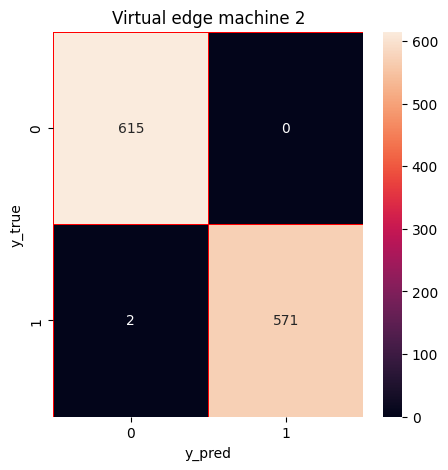

In [ ]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, learning_rate=0.5)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0007550	total: 2.9s	remaining: 615ms
165:	learn: 0.0007550	total: 2.93s	remaining: 600ms
166:	learn: 0.0007549	total: 2.95s	remaining: 583ms
167:	learn: 0.0007549	total: 2.98s	remaining: 567ms
168:	learn: 0.0007549	total: 3s	remaining: 550ms
169:	learn: 0.0007549	total: 3.03s	remaining: 535ms
170:	learn: 0.0007549	total: 3.05s	remaining: 518ms
171:	learn: 0.0007548	total: 3.09s	remaining: 502ms
172:	learn: 0.0007548	total: 3.11s	remaining: 486ms
173:	learn: 0.0007548	total: 3.13s	remaining: 468ms
174:	learn: 0.0007548	total: 3.15s	remaining: 451ms
175:	learn: 0.0007548	total: 3.18s	remaining: 434ms
176:	learn: 0.0007548	total: 3.21s	remaining: 418ms
177:	learn: 0.0007547	total: 3.24s	remaining: 401ms
178:	learn: 0.0007548	total: 3.27s	remaining: 384ms
179:	learn: 0.0007548	total: 3.3s	remaining: 367ms
180:	learn: 0.0007547	total: 3.32s	remaining: 349ms
181:	learn: 0.0007547	total: 3.35s	remaining: 332ms
182:	learn: 0.0007

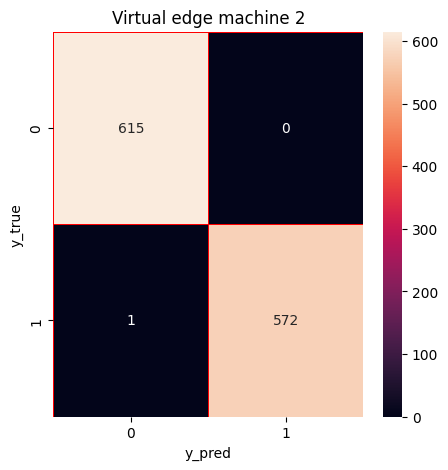

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge2 = best_model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)
cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 2: ", normal_edge2_acc)
print("Accuracy of Hyper Parameter tuned Edge 2: ", edge2_acc)

Accuracy of Normal Edge 2:  0.9983164983164983
Accuracy of Hyper Parameter tuned Edge 2:  0.9991582491582491


## Preparing Central Server's Dataset:

In [ ]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

## Central Server:
A central server is a key component in Federated Learning. It acts as a hub that aggregates the updates from multiple edge devices and uses them to improve the overall model. The central server is responsible for coordinating the training process and managing the communication between edge devices.

The central server receives the model updates from edge devices, which are trained on their local data, and uses them to update the global model. This process is called model averaging, where the central server takes the average of all the updates received from the edge devices to improve the global model. The central server can also use other techniques to aggregate the updates such as weight averaging or voting.

The central server also plays a crucial role in maintaining the security and privacy of the data. It acts as a gatekeeper for the edge devices and controls the access to the data. It also ensures that the edge devices are compliant with the security protocols.

In summary, the central server is responsible for coordinating and managing the training process in Federated Learning, by aggregating the updates from multiple edge devices, maintaining the security and privacy of the data and controlling the access to the data. It plays a crucial role in the deployment of Federated Learning systems.

> Code For Central Server:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Learning rate set to 0.020043
0:	learn: 0.6441229	total: 9.1ms	remaining: 9.09s
1:	learn: 0.6023613	total: 18.6ms	remaining: 9.29s
2:	learn: 0.5616841	total: 27.6ms	remaining: 9.18s
3:	learn: 0.5225444	total: 36.6ms	remaining: 9.1s
4:	learn: 0.4849232	total: 45.4ms	remaining: 9.04s
5:	learn: 0.4548829	total: 54.2ms	remaining: 8.98s
6:	learn: 0.4257042	total: 62.9ms	remaining: 8.93s
7:	learn: 0.4036260	total: 71.7ms	remaining: 8.89s
8:	learn: 0.3762572	total: 80.6ms	remaining: 8.87s
9:	learn: 0.3542125	total: 89.2ms	remaining: 8.84s
10:	learn: 0.3297673	total: 97.9ms	remaining: 8.8s
11:	learn: 0.3095521	total: 107ms	remaining: 8.79s
12:	learn: 0.2930318	total: 116ms	remaining: 8.79s
13:	learn: 0.2751447	total: 125ms	remaining: 8.77s
14:	learn: 0.2591086	total: 134ms	remaining: 8.78s
15:	learn: 0.2451678	total: 143ms	remaining: 8.78s
16:	learn: 0.2340319	total: 152ms	remaining: 8.78s
17:	learn: 0.2240076	total: 161ms	remaining: 8.77s
18:	learn: 0.2123062	total: 170ms	remaining: 8.79s
19:

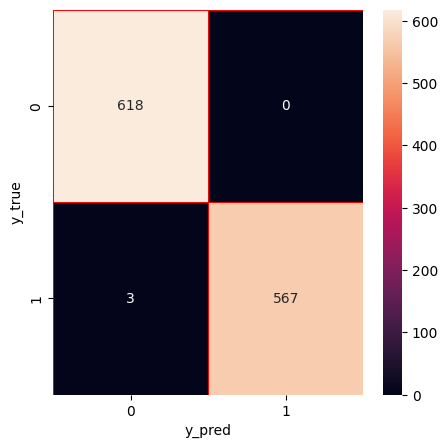

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('advanced_local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Analysis of the models:
Accuracy is a commonly used metric to evaluate the performance of machine learning models. In Federated Learning, the accuracy of the three systems, Edge Device 1, Edge Device 2 and the central server, can be used to evaluate the performance of the overall system.

The accuracy of the Edge Devices can be calculated by comparing the predictions made by the local models trained on the edge devices with the true labels of the test data. Similarly, the accuracy of the central server can be calculated by comparing the predictions made by the global model with the true labels of the test data.

A high accuracy for the Edge Devices and the central server indicates that the models are able to correctly classify the test data, and therefore have a good performance. However, it is also important to consider other evaluation metrics such as precision, recall, and F1-score, to get a more comprehensive understanding of the performance of the models.

Comparing the accuracy of the three systems can help to evaluate the performance of the overall system and identify potential issues such as overfitting or bias. It also can be used to evaluate the effect of different configurations and techniques used in Federated Learning such as data sampling, data aggregation, and model averaging on the performance of the system.

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Edge Device 1: ", edge1_acc)
print("Accuracy of Edge Device 2: ", edge2_acc)
print("Accuracy of Central Server: ", central_acc)

Accuracy of Edge Device 1:  0.9995854063018242
Accuracy of Edge Device 2:  0.9991582491582491
Accuracy of Central Server:  0.9974747474747475


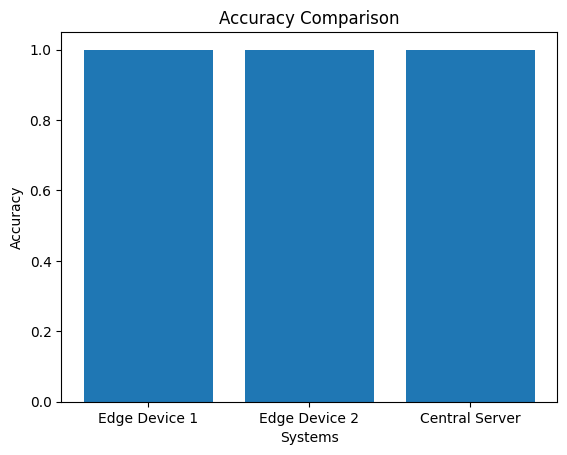

In [ ]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]

plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In [ ]:
# Find the system with the highest accuracy
best_system = max(edge1_acc, edge2_acc, central_acc)

if best_system == edge1_acc:
    # Save the model from Edge Device 1 as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(model_edge1, file)
elif best_system == edge2_acc:
    # Save the model from Edge Device 2 as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(model_edge2, file)
else:
    # Save the model from the Central Server as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(global_model, file)


In conclusion, Federated Learning is a powerful method for training machine learning models that allows for large and diverse datasets to be used without compromising the privacy of users. The three main components of Federated Learning are edge devices, central servers, and virtual edge devices. Edge devices are responsible for training local models using their own data, central servers aggregate updates from the edge devices to improve the global model, and virtual edge devices are used to simulate and test the behavior of edge devices in a controlled environment. Accuracies of the three systems are important metric to evaluate the performance of the overall system.

# Implementing PCA

## Trying With Less Important features Features

### Dataset Upload

In [ ]:
import pandas as pd
df = pd.read_csv("/content/data.csv")
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Dividing the dataset into three parts.


> The data set is divided into three equal parts to simulate individial data from users.




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/data.csv")
# df = df.dropna()
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['label']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: label, Length: 569, dtype: object

In [ ]:
df=df[['label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
df = df[df['label']!=' ']
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('label', axis=1)
y = df['label']

### Performing PCA Algorithm

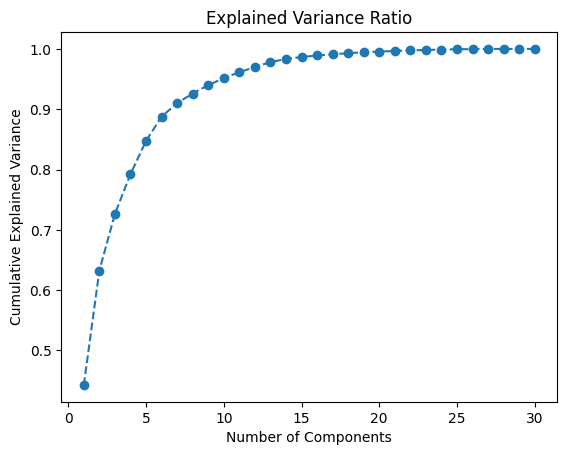

Most Important Features:
PC1       concave points_mean
PC2    fractal_dimension_mean
PC3                texture_se
PC4             texture_worst
PC5           smoothness_mean
dtype: object
Least Important Features:
PC1           smoothness_se
PC2    concave points_worst
PC3          concavity_mean
PC4            concavity_se
PC5            radius_worst
dtype: object


In [ ]:
# Assuming 'X' is your original feature matrix

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio to decide the number of components
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Step 5: Choose the number of components based on the plot or a desired explained variance threshold
desired_variance_threshold = 0.95
cumulative_variance = 0
num_components = 0

for i, variance in enumerate(explained_variance_ratio):
    cumulative_variance += variance
    num_components += 1
    if cumulative_variance >= desired_variance_threshold:
        break

# Step 6: Use the selected number of components to perform PCA again
pca = PCA(n_components=num_components)
X_final = pca.fit_transform(X_scaled)

# Step 7: Find the most important and least important features by examining the loadings of the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components)], index=X.columns)
most_important_features = loadings.abs().idxmax(axis=0)
least_important_features = loadings.abs().idxmin(axis=0)

# Step 8: Print the top 5 most important and least important features
print("Most Important Features:")
print(most_important_features.head(5))
print("Least Important Features:")
print(least_important_features.head(5))


### Preping the dataframe to accomodate less important features.

In [ ]:
# Assuming 'df' is your DataFrame

# Keep only the specified features
selected_features = ['smoothness_se', 'concave points_worst', 'concavity_mean', 'concavity_se', 'radius_worst']
X = df[selected_features]

# Now, 'X' contains only the specified features

# Print or use 'X' as needed
print("Selected Features:")
print(X)


Selected Features:
     smoothness_se  concave points_worst  concavity_mean  concavity_se  \
0         0.006399                0.2654         0.30010       0.05373   
1         0.005225                0.1860         0.08690       0.01860   
2         0.006150                0.2430         0.19740       0.03832   
3         0.009110                0.2575         0.24140       0.05661   
4         0.011490                0.1625         0.19800       0.05688   
..             ...                   ...             ...           ...   
564       0.010300                0.2216         0.24390       0.05198   
565       0.005769                0.1628         0.14400       0.03950   
566       0.005903                0.1418         0.09251       0.04730   
567       0.006522                0.2650         0.35140       0.07117   
568       0.007189                0.0000         0.00000       0.00000   

     radius_worst  
0          25.380  
1          24.990  
2          23.570  
3          1

Label Count Before SMOTE Analysis.

In [ ]:
df.label.value_counts()

B    357
M    212
Name: label, dtype: int64

### Performing SMOTE Analysis

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={"B":20000,"M":20000})

In [ ]:
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class B will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class M will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [ ]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [ ]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

### Outlier Detection and Removal using Isolation Forest Classifier

In [ ]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

In [ ]:
pd.Series(y).value_counts()

B    18538
M    17464
Name: label, dtype: int64

Dividing the data set into three equal parts ( For ED1 , ED2 and CS)

In [ ]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

### Virtual Edge Machines:
A virtual edge machine is a virtualized version of an edge device that is used in federated learning. It simulates the behavior of an actual edge device, such as a smartphone or an IoT sensor, in a controlled environment. It allows researchers and engineers to test and develop federated learning models without the need for actual physical devices.



### Virtual edge machine 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0:	learn: 0.6922894	total: 1.6ms	remaining: 78.4ms
1:	learn: 0.6914315	total: 5.75ms	remaining: 138ms
2:	learn: 0.6905792	total: 11ms	remaining: 172ms
3:	learn: 0.6897145	total: 12.4ms	remaining: 143ms
4:	learn: 0.6888754	total: 14.2ms	remaining: 128ms
5:	learn: 0.6880243	total: 16.5ms	remaining: 121ms
6:	learn: 0.6871712	total: 20.1ms	remaining: 123ms
7:	learn: 0.6863382	total: 22.1ms	remaining: 116ms
8:	learn: 0.6854815	total: 24.5ms	remaining: 112ms
9:	learn: 0.6846439	total: 27.4ms	remaining: 109ms
10:	learn: 0.6837981	total: 32ms	remaining: 113ms
11:	learn: 0.6829618	total: 33.8ms	remaining: 107ms
12:	learn: 0.6821328	total: 35.2ms	remaining: 100ms
13:	learn: 0.6812980	total: 36.6ms	remaining: 94ms
14:	learn: 0.6804558	total: 38.4ms	remaining: 89.6ms
15:	learn: 0.6796393	total: 40.8ms	remaining: 86.8ms
16:	learn: 0.6788070	total: 42.5ms	remaining: 82.5ms
17:	learn: 0.6779779	total: 46.5ms	remaining: 82.6ms
18:	learn: 0.6771543	total: 48.9ms	remaining: 79.8ms
19:	learn: 0.6763295	t

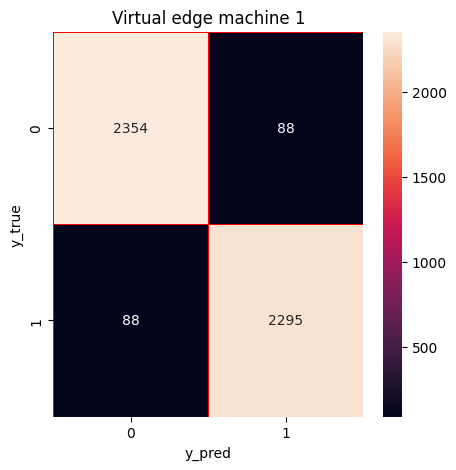

In [ ]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth =3 ,iterations=50, learning_rate=0.001)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

#### Hyper parameter tuning

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0104938	total: 664ms	remaining: 141ms
165:	learn: 0.0104473	total: 667ms	remaining: 137ms
166:	learn: 0.0103632	total: 671ms	remaining: 133ms
167:	learn: 0.0103343	total: 676ms	remaining: 129ms
168:	learn: 0.0102663	total: 688ms	remaining: 126ms
169:	learn: 0.0102411	total: 693ms	remaining: 122ms
170:	learn: 0.0102271	total: 697ms	remaining: 118ms
171:	learn: 0.0101469	total: 701ms	remaining: 114ms
172:	learn: 0.0100351	total: 706ms	remaining: 110ms
173:	learn: 0.0099436	total: 710ms	remaining: 106ms
174:	learn: 0.0099267	total: 714ms	remaining: 102ms
175:	learn: 0.0098322	total: 718ms	remaining: 97.9ms
176:	learn: 0.0097692	total: 721ms	remaining: 93.7ms
177:	learn: 0.0096803	total: 725ms	remaining: 89.6ms
178:	learn: 0.0095971	total: 729ms	remaining: 85.5ms
179:	learn: 0.0095583	total: 732ms	remaining: 81.4ms
180:	learn: 0.0094811	total: 736ms	remaining: 77.2ms
181:	learn: 0.0094423	total: 739ms	remaining: 73.1ms
182:	l

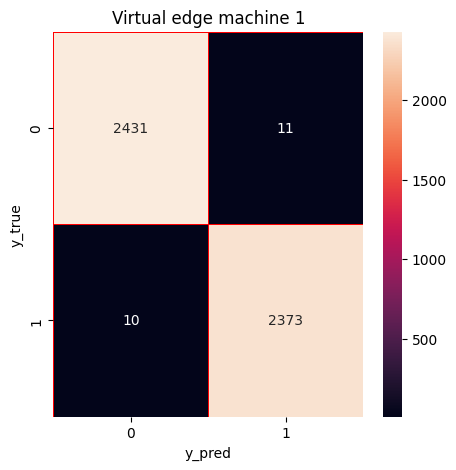

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge1 = best_model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('advanced_local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 1: ", normal_edge1_acc)
print("Accuracy of Hyper Parameter tuned Edge 1: ", edge1_acc)

Accuracy of Normal Edge 1:  0.9635233160621761
Accuracy of Hyper Parameter tuned Edge 1:  0.9956476683937824


### Virtual edge machine 2

0:	learn: 0.5777001	total: 6.16ms	remaining: 302ms
1:	learn: 0.4870599	total: 11.9ms	remaining: 286ms
2:	learn: 0.4038609	total: 17.7ms	remaining: 277ms
3:	learn: 0.3419683	total: 23.6ms	remaining: 272ms
4:	learn: 0.2907780	total: 29.6ms	remaining: 266ms
5:	learn: 0.2519265	total: 35.5ms	remaining: 261ms
6:	learn: 0.2236508	total: 41.4ms	remaining: 255ms
7:	learn: 0.1954683	total: 47.4ms	remaining: 249ms
8:	learn: 0.1712877	total: 53.2ms	remaining: 242ms
9:	learn: 0.1528245	total: 59.2ms	remaining: 237ms
10:	learn: 0.1351152	total: 64.9ms	remaining: 230ms
11:	learn: 0.1227224	total: 70.9ms	remaining: 225ms
12:	learn: 0.1120017	total: 78.2ms	remaining: 223ms
13:	learn: 0.1028849	total: 84.2ms	remaining: 216ms
14:	learn: 0.0958931	total: 89.9ms	remaining: 210ms
15:	learn: 0.0881858	total: 95.8ms	remaining: 204ms
16:	learn: 0.0834852	total: 102ms	remaining: 197ms
17:	learn: 0.0789655	total: 107ms	remaining: 191ms
18:	learn: 0.0732595	total: 113ms	remaining: 185ms
19:	learn: 0.0689796	tota

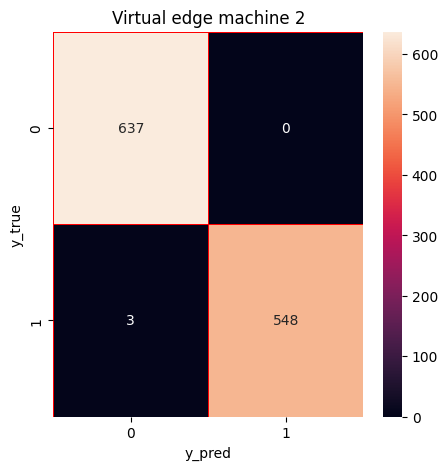

In [28]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, learning_rate=0.05)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge2 = best_model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)
cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

Streaming output truncated to the last 5000 lines.
80:	learn: 0.0031828	total: 498ms	remaining: 732ms
81:	learn: 0.0031336	total: 504ms	remaining: 725ms
82:	learn: 0.0030503	total: 510ms	remaining: 718ms
83:	learn: 0.0029350	total: 515ms	remaining: 712ms
84:	learn: 0.0028788	total: 521ms	remaining: 705ms
85:	learn: 0.0028146	total: 527ms	remaining: 698ms
86:	learn: 0.0027562	total: 533ms	remaining: 692ms
87:	learn: 0.0026619	total: 538ms	remaining: 685ms
88:	learn: 0.0026019	total: 544ms	remaining: 679ms
89:	learn: 0.0025663	total: 550ms	remaining: 672ms
90:	learn: 0.0025172	total: 556ms	remaining: 665ms
91:	learn: 0.0024547	total: 561ms	remaining: 659ms
92:	learn: 0.0023937	total: 567ms	remaining: 652ms
93:	learn: 0.0023284	total: 573ms	remaining: 646ms
94:	learn: 0.0022838	total: 579ms	remaining: 640ms
95:	learn: 0.0022378	total: 585ms	remaining: 633ms
96:	learn: 0.0021598	total: 591ms	remaining: 627ms
97:	learn: 0.0021274	total: 596ms	remaining: 621ms
98:	learn: 0.0020757	total: 602

KeyboardInterrupt: 

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 2: ", normal_edge2_acc)
print("Accuracy of Hyper Parameter tuned Edge 2: ", edge2_acc)

### Central Server

In [ ]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('advanced_local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" Central Server")
plt.show()

In [31]:
#Compare the accuracy of the three systems
print("Accuracy of Edge Device 1: ", edge1_acc)
print("Accuracy of Edge Device 2: ", edge2_acc)
print("Accuracy of Central Server: ", central_acc)

Accuracy of Edge Device 1:  0.9997927031509121


NameError: name 'edge2_acc' is not defined

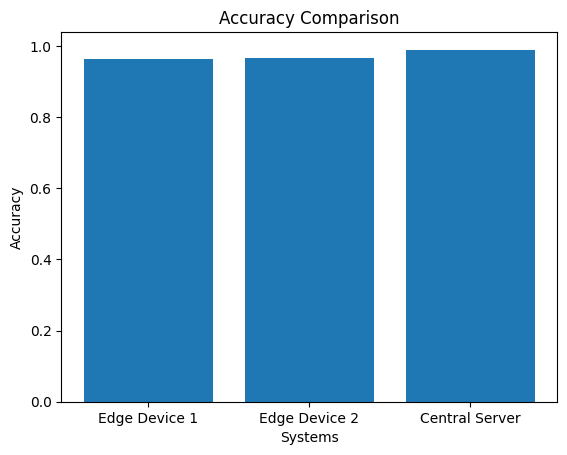

In [ ]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]

plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

## Similarly With the most important features

### Dataset Upload

In [2]:
import pandas as pd
df = pd.read_csv("/content/data.csv")
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Dividing the dataset into three parts.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/data.csv")
# df = df.dropna()
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df['label']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: label, Length: 569, dtype: object

In [12]:
df=df[['label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
df = df[df['label']!=' ']
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('label', axis=1)
y = df['label']

### Performing PCA Algorithm

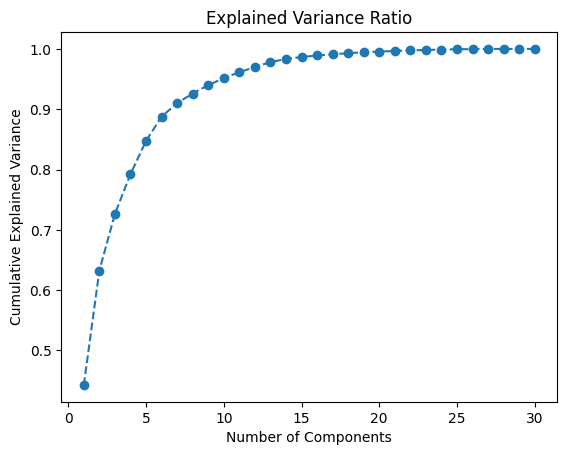

Most Important Features:
PC1       concave points_mean
PC2    fractal_dimension_mean
PC3                texture_se
PC4             texture_worst
PC5           smoothness_mean
dtype: object
Least Important Features:
PC1           smoothness_se
PC2    concave points_worst
PC3          concavity_mean
PC4            concavity_se
PC5            radius_worst
dtype: object


In [15]:
# Assuming 'X' is your original feature matrix

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio to decide the number of components
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Step 5: Choose the number of components based on the plot or a desired explained variance threshold
desired_variance_threshold = 0.95
cumulative_variance = 0
num_components = 0

for i, variance in enumerate(explained_variance_ratio):
    cumulative_variance += variance
    num_components += 1
    if cumulative_variance >= desired_variance_threshold:
        break

# Step 6: Use the selected number of components to perform PCA again
pca = PCA(n_components=num_components)
X_final = pca.fit_transform(X_scaled)

# Step 7: Find the most important and least important features by examining the loadings of the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components)], index=X.columns)
most_important_features = loadings.abs().idxmax(axis=0)
least_important_features = loadings.abs().idxmin(axis=0)

# Step 8: Print the top 5 most important and least important features
print("Most Important Features:")
print(most_important_features.head(5))
print("Least Important Features:")
print(least_important_features.head(5))


### Preping the dataframe to accomodate More important features.

In [16]:
# Assuming 'df' is your DataFrame

# Keep only the specified features
selected_features = ['concave points_mean', 'fractal_dimension_mean', 'texture_se', 'texture_worst', 'smoothness_mean']
X = df[selected_features]

# Now, 'X' contains only the specified features

# Print or use 'X' as needed
print("Selected Features:")
print(X)

Selected Features:
     concave points_mean  fractal_dimension_mean  texture_se  texture_worst  \
0                0.14710                 0.07871      0.9053          17.33   
1                0.07017                 0.05667      0.7339          23.41   
2                0.12790                 0.05999      0.7869          25.53   
3                0.10520                 0.09744      1.1560          26.50   
4                0.10430                 0.05883      0.7813          16.67   
..                   ...                     ...         ...            ...   
564              0.13890                 0.05623      1.2560          26.40   
565              0.09791                 0.05533      2.4630          38.25   
566              0.05302                 0.05648      1.0750          34.12   
567              0.15200                 0.07016      1.5950          39.42   
568              0.00000                 0.05884      1.4280          30.37   

     smoothness_mean  
0        

In [17]:
df.label.value_counts()

B    357
M    212
Name: label, dtype: int64

### Performing SMOTE Analysis

In [18]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={"B":20000,"M":20000})

In [19]:
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class B will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class M will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Label Count AFTER SMOTE Analysis.

In [21]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [22]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

Label Count AFTER SMOTE Analysis.

In [23]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [24]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

### Outlier Detection and Removal using Isolation Forest Classifier

In [25]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [26]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

In [27]:
pd.Series(y).value_counts()

B    18096
M    17905
Name: label, dtype: int64

Dividing the data set into three equal parts ( For ED1 , ED2 and CS)

In [28]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

### Virtual Edge Machines:
A virtual edge machine is a virtualized version of an edge device that is used in federated learning. It simulates the behavior of an actual edge device, such as a smartphone or an IoT sensor, in a controlled environment. It allows researchers and engineers to test and develop federated learning models without the need for actual physical devices.



### > Virtual edge machine 1

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0:	learn: 0.3819513	total: 47.9ms	remaining: 2.35s
1:	learn: 0.2499725	total: 49.8ms	remaining: 1.2s
2:	learn: 0.1773559	total: 51.5ms	remaining: 806ms
3:	learn: 0.1399864	total: 53ms	remaining: 610ms
4:	learn: 0.1103742	total: 54.5ms	remaining: 491ms
5:	learn: 0.0942982	total: 56ms	remaining: 410ms
6:	learn: 0.0851064	total: 57.4ms	remaining: 352ms
7:	learn: 0.0770609	total: 58.8ms	remaining: 309ms
8:	learn: 0.0675434	total: 60.2ms	remaining: 274ms
9:	learn: 0.0609954	total: 61.7ms	remaining: 247ms
10:	learn: 0.0567944	total: 63.1ms	remaining: 224ms
11:	learn: 0.0522480	total: 64.5ms	remaining: 204ms
12:	learn: 0.0478621	total: 66ms	remaining: 188ms
13:	learn: 0.0458238	total: 67.5ms	remaining: 173ms
14:	learn: 0.0431292	total: 69ms	remaining: 161ms
15:	learn: 0.0413832	total: 70.5ms	remaining: 150ms
16:	learn: 0.0403687	total: 71.9ms	remaining: 140ms
17:	learn: 0.0382071	total: 73.4ms	remaining: 130ms
18:	learn: 0.0368599	total: 74.7ms	remaining: 122ms
19:	learn: 0.0349193	total: 76.

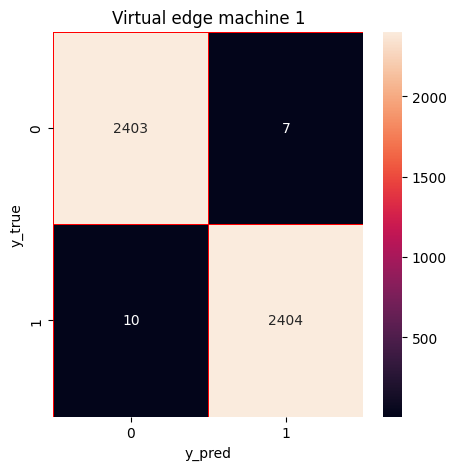

In [30]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth =3 ,iterations=50, learning_rate=0.5)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0020311	total: 974ms	remaining: 207ms
165:	learn: 0.0020311	total: 977ms	remaining: 200ms
166:	learn: 0.0020041	total: 981ms	remaining: 194ms
167:	learn: 0.0020041	total: 983ms	remaining: 187ms
168:	learn: 0.0020041	total: 986ms	remaining: 181ms
169:	learn: 0.0020041	total: 989ms	remaining: 175ms
170:	learn: 0.0019719	total: 992ms	remaining: 168ms
171:	learn: 0.0019573	total: 996ms	remaining: 162ms
172:	learn: 0.0019572	total: 999ms	remaining: 156ms
173:	learn: 0.0019373	total: 1s	remaining: 150ms
174:	learn: 0.0019043	total: 1.01s	remaining: 144ms
175:	learn: 0.0018856	total: 1.01s	remaining: 138ms
176:	learn: 0.0018856	total: 1.01s	remaining: 132ms
177:	learn: 0.0018856	total: 1.02s	remaining: 126ms
178:	learn: 0.0018856	total: 1.02s	remaining: 120ms
179:	learn: 0.0018855	total: 1.02s	remaining: 114ms
180:	learn: 0.0018855	total: 1.03s	remaining: 108ms
181:	learn: 0.0018855	total: 1.03s	remaining: 102ms
182:	learn: 0.00

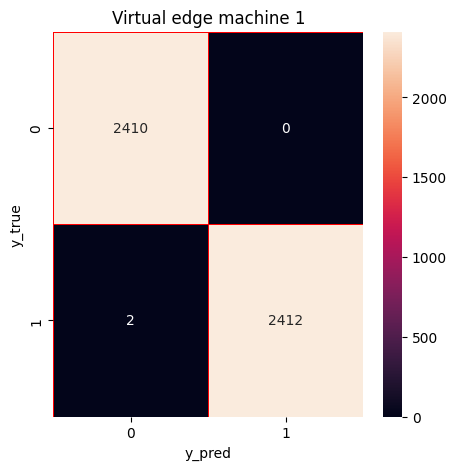

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge1 = best_model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('advanced_local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

In [32]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 1: ", normal_edge1_acc)
print("Accuracy of Hyper Parameter tuned Edge 1: ", edge1_acc)

Accuracy of Normal Edge 1:  0.9964759535655058
Accuracy of Hyper Parameter tuned Edge 1:  0.9995854063018242


### Virtual edge machine 2

0:	learn: 0.3938469	total: 2.24ms	remaining: 110ms
1:	learn: 0.2556234	total: 7.39ms	remaining: 177ms
2:	learn: 0.1800592	total: 11.4ms	remaining: 179ms
3:	learn: 0.1284806	total: 15.6ms	remaining: 180ms
4:	learn: 0.0975981	total: 19.7ms	remaining: 177ms
5:	learn: 0.0781441	total: 26.5ms	remaining: 194ms
6:	learn: 0.0648471	total: 29.7ms	remaining: 182ms
7:	learn: 0.0545836	total: 33.8ms	remaining: 178ms
8:	learn: 0.0477456	total: 37.5ms	remaining: 171ms
9:	learn: 0.0433971	total: 39.5ms	remaining: 158ms
10:	learn: 0.0398071	total: 40.9ms	remaining: 145ms
11:	learn: 0.0362168	total: 43.3ms	remaining: 137ms
12:	learn: 0.0337465	total: 48ms	remaining: 137ms
13:	learn: 0.0314991	total: 50ms	remaining: 129ms
14:	learn: 0.0298875	total: 51.9ms	remaining: 121ms
15:	learn: 0.0279775	total: 53.9ms	remaining: 115ms
16:	learn: 0.0250975	total: 56ms	remaining: 109ms
17:	learn: 0.0243974	total: 57.7ms	remaining: 103ms
18:	learn: 0.0233902	total: 59.4ms	remaining: 97ms
19:	learn: 0.0226927	total: 6

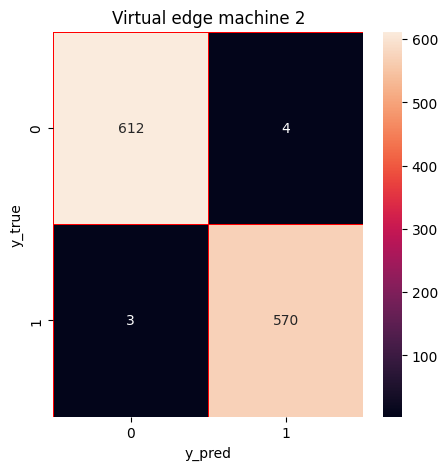

In [33]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, learning_rate=0.5)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0020311	total: 608ms	remaining: 129ms
165:	learn: 0.0020311	total: 611ms	remaining: 125ms
166:	learn: 0.0020041	total: 618ms	remaining: 122ms
167:	learn: 0.0020041	total: 622ms	remaining: 119ms
168:	learn: 0.0020041	total: 627ms	remaining: 115ms
169:	learn: 0.0020041	total: 631ms	remaining: 111ms
170:	learn: 0.0019719	total: 634ms	remaining: 108ms
171:	learn: 0.0019573	total: 639ms	remaining: 104ms
172:	learn: 0.0019572	total: 642ms	remaining: 100ms
173:	learn: 0.0019373	total: 646ms	remaining: 96.5ms
174:	learn: 0.0019043	total: 649ms	remaining: 92.8ms
175:	learn: 0.0018856	total: 653ms	remaining: 89.1ms
176:	learn: 0.0018856	total: 656ms	remaining: 85.2ms
177:	learn: 0.0018856	total: 659ms	remaining: 81.4ms
178:	learn: 0.0018856	total: 662ms	remaining: 77.6ms
179:	learn: 0.0018855	total: 665ms	remaining: 73.9ms
180:	learn: 0.0018855	total: 668ms	remaining: 70.1ms
181:	learn: 0.0018855	total: 671ms	remaining: 66.3ms
182:

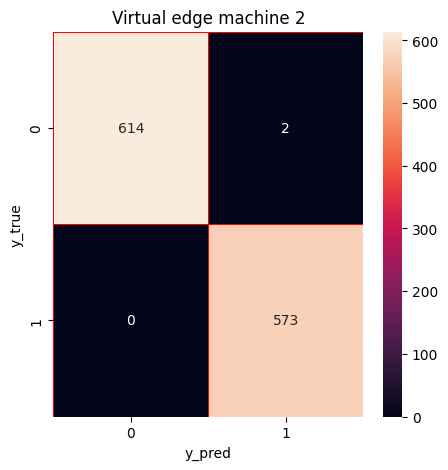

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge2 = best_model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)
cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [35]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 2: ", normal_edge2_acc)
print("Accuracy of Hyper Parameter tuned Edge 2: ", edge2_acc)

Accuracy of Normal Edge 2:  0.9941126997476871
Accuracy of Hyper Parameter tuned Edge 2:  0.9983179142136249


### Central Server

In [36]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

Learning rate set to 0.020043
0:	learn: 0.6610710	total: 2.06ms	remaining: 2.06s
1:	learn: 0.6177994	total: 4.05ms	remaining: 2.02s
2:	learn: 0.5758084	total: 6.21ms	remaining: 2.06s
3:	learn: 0.5351879	total: 8.38ms	remaining: 2.09s
4:	learn: 0.5065800	total: 10.3ms	remaining: 2.05s
5:	learn: 0.4708133	total: 12.2ms	remaining: 2.02s
6:	learn: 0.4469183	total: 14.3ms	remaining: 2.02s
7:	learn: 0.4192313	total: 16.2ms	remaining: 2.01s
8:	learn: 0.3916975	total: 18.2ms	remaining: 2s
9:	learn: 0.3671659	total: 20.9ms	remaining: 2.07s
10:	learn: 0.3481826	total: 23.4ms	remaining: 2.1s
11:	learn: 0.3340647	total: 25.8ms	remaining: 2.13s
12:	learn: 0.3145177	total: 28.2ms	remaining: 2.14s
13:	learn: 0.2957000	total: 30.4ms	remaining: 2.14s
14:	learn: 0.2775227	total: 32.6ms	remaining: 2.14s
15:	learn: 0.2637757	total: 34.8ms	remaining: 2.14s
16:	learn: 0.2470140	total: 36.9ms	remaining: 2.13s
17:	learn: 0.2352975	total: 39ms	remaining: 2.13s
18:	learn: 0.2242138	total: 41.2ms	remaining: 2.13

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


66:	learn: 0.0565098	total: 150ms	remaining: 2.09s
67:	learn: 0.0556533	total: 154ms	remaining: 2.12s
68:	learn: 0.0548000	total: 157ms	remaining: 2.11s
69:	learn: 0.0540859	total: 159ms	remaining: 2.11s
70:	learn: 0.0532443	total: 161ms	remaining: 2.11s
71:	learn: 0.0525701	total: 163ms	remaining: 2.1s
72:	learn: 0.0517420	total: 165ms	remaining: 2.1s
73:	learn: 0.0510468	total: 167ms	remaining: 2.1s
74:	learn: 0.0502047	total: 170ms	remaining: 2.09s
75:	learn: 0.0493464	total: 172ms	remaining: 2.09s
76:	learn: 0.0485617	total: 174ms	remaining: 2.08s
77:	learn: 0.0478739	total: 176ms	remaining: 2.08s
78:	learn: 0.0472141	total: 178ms	remaining: 2.08s
79:	learn: 0.0465948	total: 180ms	remaining: 2.07s
80:	learn: 0.0460461	total: 183ms	remaining: 2.08s
81:	learn: 0.0456063	total: 185ms	remaining: 2.07s
82:	learn: 0.0450640	total: 187ms	remaining: 2.07s
83:	learn: 0.0446574	total: 192ms	remaining: 2.1s
84:	learn: 0.0441183	total: 195ms	remaining: 2.1s
85:	learn: 0.0435359	total: 197ms	re

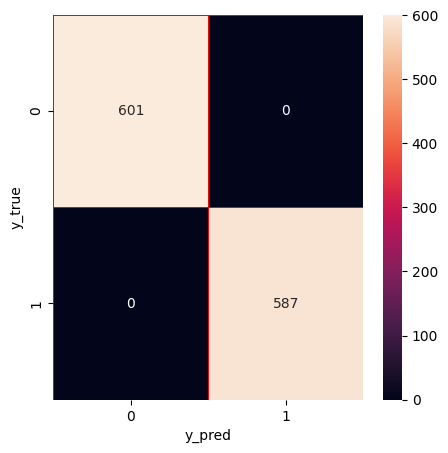

In [37]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('advanced_local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [38]:
#Compare the accuracy of the three systems
print("Accuracy of Edge Device 1: ", edge1_acc)
print("Accuracy of Edge Device 2: ", edge2_acc)
print("Accuracy of Central Server: ", central_acc)

Accuracy of Edge Device 1:  0.9995854063018242
Accuracy of Edge Device 2:  0.9983179142136249
Accuracy of Central Server:  1.0


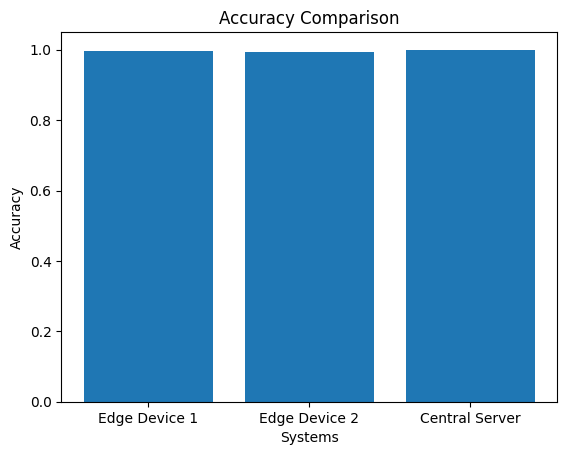

In [39]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]

plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()